In [1]:
%matplotlib inline
import time
import snap
import math
import random
import warnings
import operator
import numpy as np
import pandas as pd
import networkx as nx
import itertools as itools
import matplotlib.pyplot as plt
from random import sample
from IPython.display import Image

warnings.filterwarnings('ignore')
networkWritePath = "cleaned/network_analysis/"

## Load & validate dataset
explore the network text file size of each suspect

In [2]:
suspectFileList = []
with open('metadata/suspectInfo.txt', 'r') as f:
    for line in f.readlines():
        suspectName, followers, pattern = line.split(",")
        filename = "".join(suspectName.split())
        suspectFileList.append(f"{filename}.txt")

print("target files: \n")        
print(suspectFileList)

for suspect in suspectFileList:
    suspectName = suspect.split(".")[0]
    print(f"\nexploring the data from suspect <{suspectName}>")
    df = pd.read_csv(f"{networkWritePath}{suspectName}.txt", sep=" ", dtype=object, names=["Node", "Neighbor"])
    display(df)

target files: 

['HarveyWeinstein.txt', 'LarryNassar.txt', 'CristianoRonaldo.txt', 'MarkHalperin.txt', 'NeildeGrasseTyson.txt', 'MattLauer.txt', 'RussellSimmons.txt', 'AlFranken.txt']

exploring the data from suspect <HarveyWeinstein>


,Node,Neighbor
0,1050071516753342464,1050075717810049024
1,1050071516753342464,1049867032206827520
2,1050071516753342464,1049971761201041408
3,1050071516753342464,1049998777392791552
4,1050071516753342464,1050002520033112064
...,...,...
849675,1193453132023508992,1193442036097130496
849676,1193453132023508992,1193297660796530689
849677,1193454239810539521,1193442036097130496
849678,1193454239810539521,1193297660796530689



exploring the data from suspect <LarryNassar>


,Node,Neighbor
0,1079469452708610049,1079429222744145921
1,1079469452708610049,1079417019198509057
2,1079469452708610049,1079412914451292160
3,1079469452708610049,1079413581681254400
4,1079469452708610049,1079413110040084481
...,...,...
3253,1178297060002615297,1178294404622245888
3254,1178297060002615297,1178294254453628928
3255,1178295730102001665,1178294404622245888
3256,1178295730102001665,1178294254453628928



exploring the data from suspect <CristianoRonaldo>


,Node,Neighbor
0,1049966662261325824,1049769162141253633
1,1049966662261325824,1049612954876989440
2,1049769162141253633,1049612954876989440
3,1050760776682745856,1050759339839877125
4,1050760776682745856,1050754756405166080
...,...,...
2723,1154381294219886592,1154251744072720385
2724,1154381294219886592,1154248866889228288
2725,1154380052022169600,1154251744072720385
2726,1154380052022169600,1154248866889228288



exploring the data from suspect <MarkHalperin>


,Node,Neighbor
0,1046742693106388993,1046740275387912192
1,1046742693106388993,1046740656373157890
2,1046740275387912192,1046740656373157890
3,1233684986563305472,1233169789172027392
4,1233684986563305472,1233157582954618881
...,...,...
98,1192631074284810245,1192629209426014214
99,1192629311968202752,1192629209426014214
100,1192713564643049472,1192700911518269440
101,1192713564643049472,1192692326897983488



exploring the data from suspect <NeildeGrasseTyson>


,Node,Neighbor
0,1076547452658868224,1075953951261032448
1,1075953818280579077,1078655081560432640



exploring the data from suspect <MattLauer>


,Node,Neighbor
0,1052923365579808768,1052998102427344897
1,1052923365579808768,1052973985930063874
2,1052923365579808768,1052975657695744000
3,1052923365579808768,1052995049695383554
4,1052923365579808768,1052906398349230082
...,...,...
225,1188688746666967042,1188665999345639424
226,1188688746666967042,1188660579164020736
227,1188665999345639424,1188660579164020736
228,1188821814161657858,1188820596601188352



exploring the data from suspect <RussellSimmons>


,Node,Neighbor
0,1052729883695218688,1052090829517377536
1,1052729883695218688,1052032986902880256
2,1052729883695218688,1052028789595787264
3,1052729883695218688,1052024185663483904
4,1052729883695218688,1052024515390308353
...,...,...
899,1188814189512417282,1188809604131520519
900,1188814189512417282,1188625989590372353
901,1188811664621232128,1188809604131520519
902,1188811664621232128,1188625989590372353



exploring the data from suspect <AlFranken>


,Node,Neighbor
0,1079450331413647363,1079406810115788801
1,1079450331413647363,1079391384740614144
2,1079450331413647363,1079389731807551488
3,1079450331413647363,1079390227880235008
4,1079450331413647363,1079390688498905089
...,...,...
4069,1189028614790094848,1188962385853173762
4070,1189028614790094848,1188816071836471297
4071,1188962385853173762,1188816071836471297
4072,1188919036966555648,1188875276069015554


## Setup helper function for basic network analysis

### The number of nodes and edges, diameter of graph, shortest path

In [3]:
def getSnapNetworkInfo(GS):
    # SNAP calculate the number of nodes and edges, diameter of graph, shortest path
    start_time = time.time()
    num_of_nodes = GS.GetNodes()
    num_of_edges = GS.GetEdges()
    avg_shortest_path = snap.GetBfsEffDiamAll(GS, num_of_nodes, False)[-1]
    print(f"number of nodes: {num_of_nodes}")
    print(f"number of edges: {num_of_edges}")
    print(f"diameter of graph: {GS.GetBfsFullDiam(num_of_nodes, False)}")
    print(f"average shortest path length: {avg_shortest_path}")
    print("--- %s seconds ---" % (time.time() - start_time))

In [4]:
def getNetworkInfo(G):
    # NetworkX calculate the number of nodes and edges, diameter of graph, shortest path
    start_time = time.time()
    print(f"number of nodes: {G.number_of_nodes()}")
    print(f"number of edges: {G.number_of_edges()}")
    print(f"diameter of graph: {nx.diameter(G)}")
    print(f"average shortest path length: {nx.average_shortest_path_length(G)}")
    print("--- %s seconds ---" % (time.time() - start_time))

### Use networkX & Snap read data into graph structure
To fully understand the network structure of the #metoo dataset, we choose the suspect **Harvey Weinstein** as an example (has most edges)

In [5]:
exampleSuspectName = "HarveyWeinstein"

In [6]:
G = nx.read_edgelist(f'{networkWritePath}{exampleSuspectName}.txt')
GS = snap.LoadEdgeList(snap.TUNGraph, f"{networkWritePath}{exampleSuspectName}.txt", 0, 1)

### Find graph features

In [7]:
print(f"tree --> {nx.is_tree(G)}")
print(f"connected graph --> {nx.is_connected(G)}")
print(f"directed graph --> {nx.is_directed(G)}")
print(f"bipartite graph --> {nx.is_bipartite(G)}")
print(f"weighted graph --> {nx.is_weighted(G)}")

tree --> False
connected graph --> False
directed graph --> False
bipartite graph --> False
weighted graph --> False


### Connected components & density

In [8]:
print(f"number of connected components: {nx.number_connected_components(G)}")
print(f"graph density: {nx.density(G)}")

number of connected components: 623
graph density: 0.02494646893753873


### Explore the connected components in dataset
Since we have preprocessed the data and transformed into different pieces based in suspect, each graph will be consisted of multiple connected components (each component is not connect to other component)

below cell shows the number of nodes in each connected component

In [9]:
target = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(target)

[735, 624, 454, 420, 284, 231, 195, 186, 155, 136, 117, 116, 115, 91, 89, 79, 78, 76, 64, 61, 55, 52, 49, 47, 46, 43, 42, 40, 39, 39, 38, 38, 35, 35, 33, 33, 31, 30, 30, 30, 30, 29, 29, 28, 27, 27, 25, 25, 23, 22, 22, 22, 22, 21, 21, 21, 20, 20, 19, 19, 19, 19, 18, 18, 18, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4

According to our understanding, all the components in our graph will be a **clique** <br>
Therefore, if a subgraph (single connected component) has **n** nodes <br>
it will contains **n x (n - 1) / 2** edges

We can verify our assumption by using networkX to calculate the number of nodes and edges

In [10]:
# store each connected component as subgraph in a list
S = [G.subgraph(c).copy() for c in nx.connected_components(G) if len(c) > 10]
S.sort(key=len)
getNetworkInfo(S[-1]) # verify our assumption for the largest connected component

number of nodes: 735
number of edges: 269745
diameter of graph: 1
average shortest path length: 1.0
--- 0.6102688312530518 seconds ---


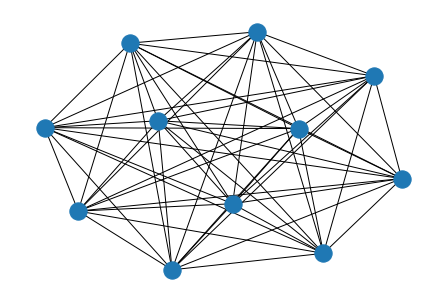

In [11]:
# display the smallest clique in the subgraph list
largestClique = S[-1]
middleSizeClique = S[-70]
smallestClique = S[0]
nx.draw(smallestClique)

### setup helper function for graph plotting & display

code reference: [Rainbow Coloring](https://networkx.org/documentation/stable/auto_examples/drawing/plot_rainbow_coloring.html#sphx-glr-auto-examples-drawing-plot-rainbow-coloring-py)
<br>

In [12]:
def rainbowColoringDisplay(g):

    node_dist_to_color = {
        1: "tab:red",
        2: "tab:orange",
        3: "tab:olive",
        4: "tab:green",
        5: "tab:blue",
        6: "tab:purple",
    }

    # A graph with (2n + 1) nodes requires n colors for the edges
    nnodes = len(list(S[0].nodes()))
    n = (nnodes - 1) // 2
    ndist_iter = list(range(1, n + 1))

    # Take advantage of circular symmetry in determining node distances
    ndist_iter += ndist_iter[::-1]


    def cycle(nlist, n):
        return nlist[-n:] + nlist[:-n]


    def draw(G):
        # Rotate nodes around the circle and assign colors for each edge based on
        # node distance
        nodes = list(G.nodes())
        for i, nd in enumerate(ndist_iter):
            for u, v in zip(nodes, cycle(nodes, i + 1)):
                G[u][v]["color"] = node_dist_to_color[nd]

        pos = nx.circular_layout(G)
        # Create a figure with 1:1 aspect ratio to preserve the circle.
        fig, ax = plt.subplots(figsize=(8, 8))
        node_opts = {"node_size": 500, "node_color": "w", "edgecolors": "k", "linewidths": 2.0}
        nx.draw_networkx_nodes(G, pos, **node_opts)
        nx.draw_networkx_labels(G, pos, font_size=14)
        # Extract color from edge data
        edge_colors = [edgedata["color"] for _, _, edgedata in G.edges(data=True)]
        nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors)

        ax.set_axis_off()
        fig.tight_layout()
        plt.show()

    draw(g)

code reference: [Giant Component](https://networkx.org/documentation/stable/auto_examples/graphviz_layout/plot_giant_component.html#sphx-glr-auto-examples-graphviz-layout-plot-giant-component-py)
<br>

In [13]:
def findGiantComponent(G):
    n = len(list(G.nodes()))  # 150 nodes
    # p value at which giant component (of size log(n) nodes) is expected
    p_giant = 1.0 / (n - 1)
    # p value at which graph is expected to become completely connected
    p_conn = math.log(n) / n

    # the following range of p values should be close to the threshold
    pvals = [0.003, 0.006, 0.008, 0.015]

    fig, axes = plt.subplots(2, 2)
    for p, ax, seed in zip(pvals, axes.ravel(), range(len(pvals))):
        #### generate graph ####
        G = nx.binomial_graph(n, p, seed=seed)
        # identify connected/disconnected nodes
        connected = [n for n, d in G.degree() if d > 0]
        disconnected = list(set(G.nodes()) - set(connected))
        # identify largest connected component
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])
        #### draw graph ####
        pos = nx.nx_agraph.graphviz_layout(G)
        ax.set_title(f"p = {p:.3f}")
        # draw largest connected component
        options = {"ax": ax, "edge_color": "tab:red"}
        nx.draw_networkx_edges(G0, pos, width=6.0, **options)
        # draw other connected components
        for Gi in Gcc[1:]:
            if len(Gi) > 1:
                nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.3, width=5.0, **options)
        # draw connected/disconnected nodes
        options = {"ax": ax, "node_size": 30, "edgecolors": "white"}
        nx.draw(G, pos, nodelist=connected, **options)
        nx.draw(G, pos, nodelist=disconnected, alpha=0.25, **options)
    fig.tight_layout()
    plt.show()

By referring to the rainbow coloring display, we can see that due to the small amount of data, even if some partition data is incorporated, The Retweet group (or organization/community) in data is still the **clique's data structure**

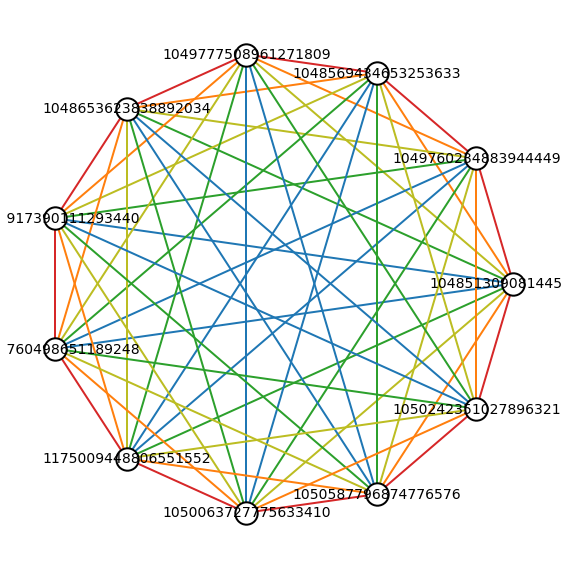

In [14]:
rainbowColoringDisplay(smallestClique)

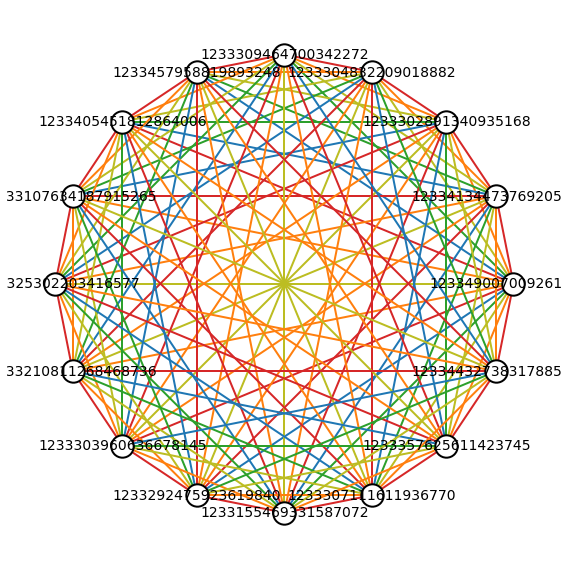

In [15]:
rainbowColoringDisplay(middleSizeClique)

#### Three cliques of different sizes were randomly selected to establish the connection (edge)

In [16]:
largeClique = S[-5]
middleSizeClique = S[-25]
smallClique = S[60]

The experimental data for each notebook used only five partitions as a test. We assume that when the data is expanded to 33 partitions, we will find many nodes that can associate with different Cliques. Therefore, a new pseudo-graph will be built to simulate the results of successful scaling of the dataset

In [17]:
adj = [] # initialize a empty adjacency list for simulation

def writeEdgeList(adjList, suspectName, fileType='txt'):
    filename = "".join(suspectName.split())
    with open(f'{networkWritePath}{filename}.{fileType}', 'w') as f:
        for txt in adjList:
            f.write(f"{txt}\n")

def reconstruct(nodeList):
    for i, node in enumerate(nodeList):
        for j in range(i, len(nodeList)):
            adj.append(f"{node} {nodeList[j]}")
    
c1, c2, c3 = list(largeClique.nodes()), list(middleSizeClique.nodes()), list(smallClique.nodes())   
reconstruct(c1)
reconstruct(c2)
reconstruct(c3)

# connect some random nodes between each clique
s = set()
rc1, rc2, rc3 = 0, 0, 0

for _ in range(50): # randomly connect at most 50 nodes in large clique and small clique
    while rc1 not in s and rc3 not in s:
        rc1, rc3 = random.choice(c1), random.choice(c3)
        adj.append(f"{rc1} {rc3}")
        s.add(rc1)
        s.add(rc3)

for _ in range(15): # randomly connect at most 15 nodes in middle clique and small clique
    while rc2 not in s and rc3 not in s:
        rc2, rc3 = random.choice(c1), random.choice(c2), random.choice(c3)
        adj.append(f"{rc2} {rc3}")
        s.add(rc2)
        s.add(rc3)

print(f"number of edges in new pseudo graph {len(adj)}")
writeEdgeList(adj, "simulation_graph")

number of edges in new pseudo graph 41783


#### Use networkX to load the new pseudo graph (for simulation)

In [18]:
filePath = f'{networkWritePath}simulation_graph.txt'
GP = nx.read_edgelist(filePath)

### Simulation of betweenness centrality after data scaling

betweenness centrality analysis with chart using WormNet v.3-GS

In [19]:
def betCentAnalysis(filePath):
    # code reference from https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html
    G1 = nx.read_edgelist(filePath)
    num_to_remove = int(len(G1) / 1.5)
    nodes = sample(list(G1.nodes), num_to_remove)
    G1.remove_nodes_from(nodes)

    # remove low-degree nodes
    low_degree = [n for n, d in G.degree() if d < 10]
    G1.remove_nodes_from(low_degree)

    # largest connected component
    components = nx.connected_components(G1)
    largest_component = max(components, key=len)
    H = G1.subgraph(largest_component)

    # compute centrality
    centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

    # compute community structure
    lpc = nx.community.label_propagation_communities(H)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    #### draw graph ####
    fig, ax = plt.subplots(figsize=(20, 15))
    pos = nx.spring_layout(H, k=0.15, seed=4572321)
    node_color = [community_index[n] for n in H]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        H,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "k", "fontweight": "bold", "fontsize": 20}
    ax.set_title("pseudo graph network", font)
    # Change font color for legend
    font["color"] = "r"

    ax.text(
        0.80,
        0.10,
        "node color = community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "node size = betweeness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readibility
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.show()



According to the **betweenness centrality structure** in the pseudo graph, we can find that all nodes can already be connected through different paths. That said, it's enough to explore with the undirected Graph analysis we did in class.

In addition, we found that node color was used to mark community structure on the way. We can even further **analyze the role of each core node in the positive or negative volume of Tweets from "Metoo Suspect"** by speculations of larger nodes.

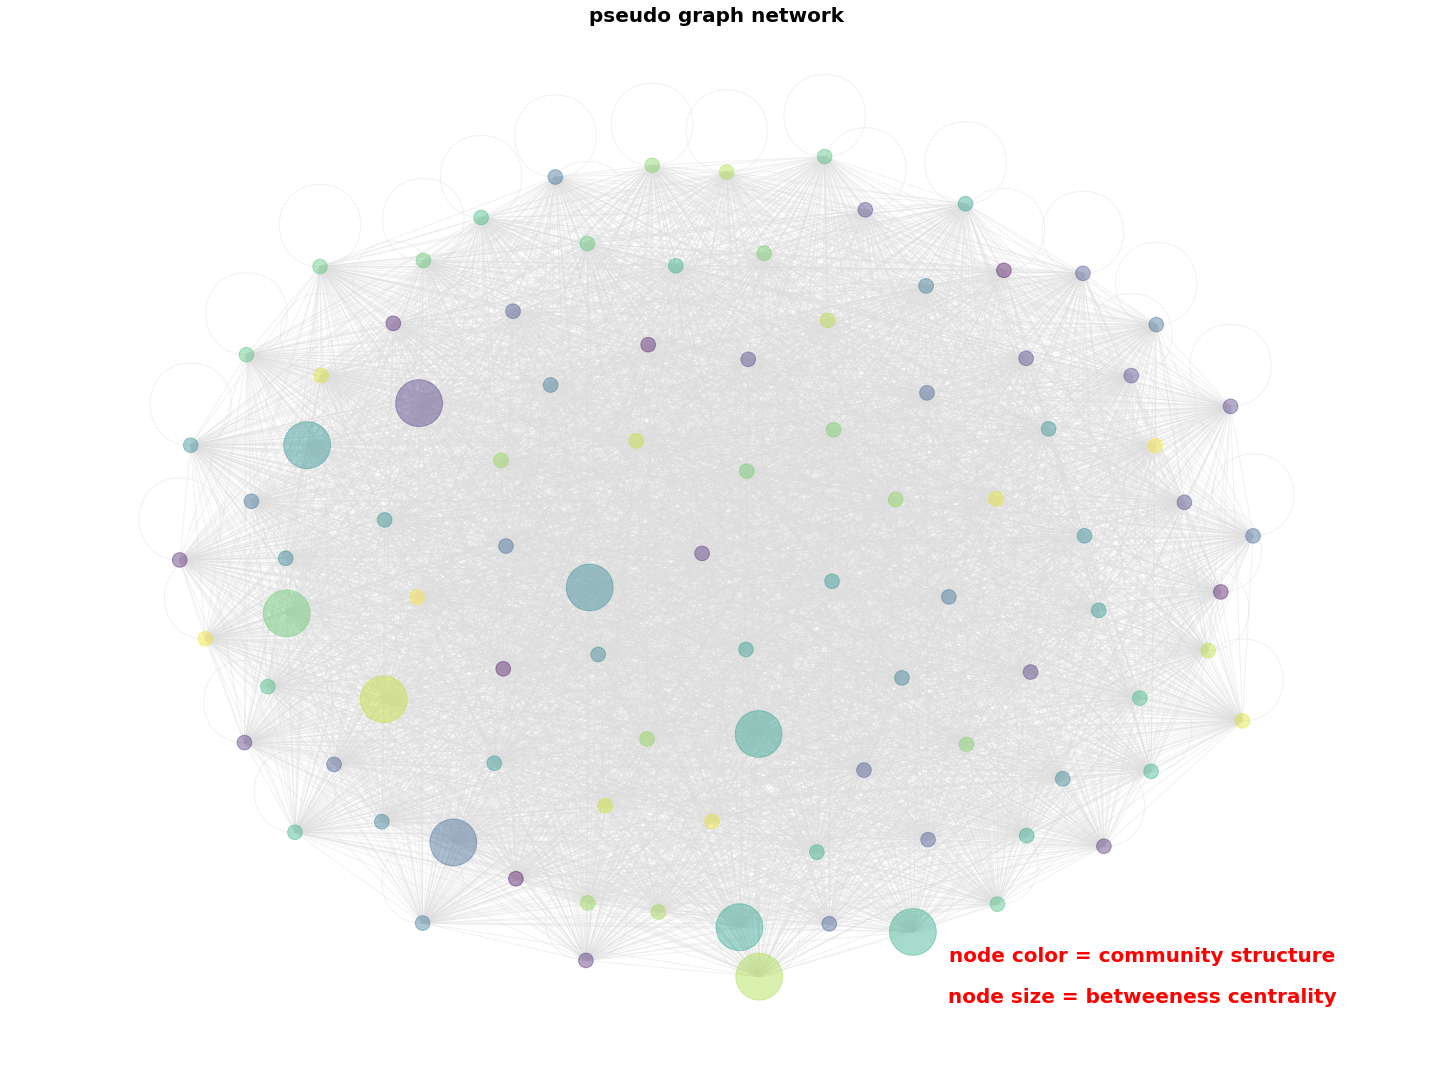

In [20]:
betCentAnalysis(filePath)

At the same time, we can visualize the giant component distribution in the Pseudo Graph

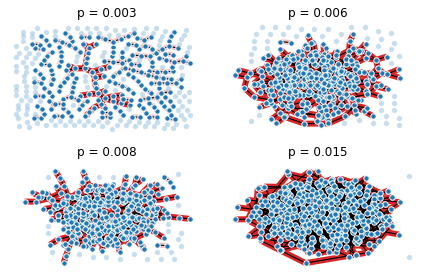

In [21]:
findGiantComponent(GP)

## small world network and heavy-tail analysis

### display log-log plot 

Fontconfig warning: ignoring UTF-8: not a valid region tag
Fontconfig warning: ignoring UTF-8: not a valid region tag


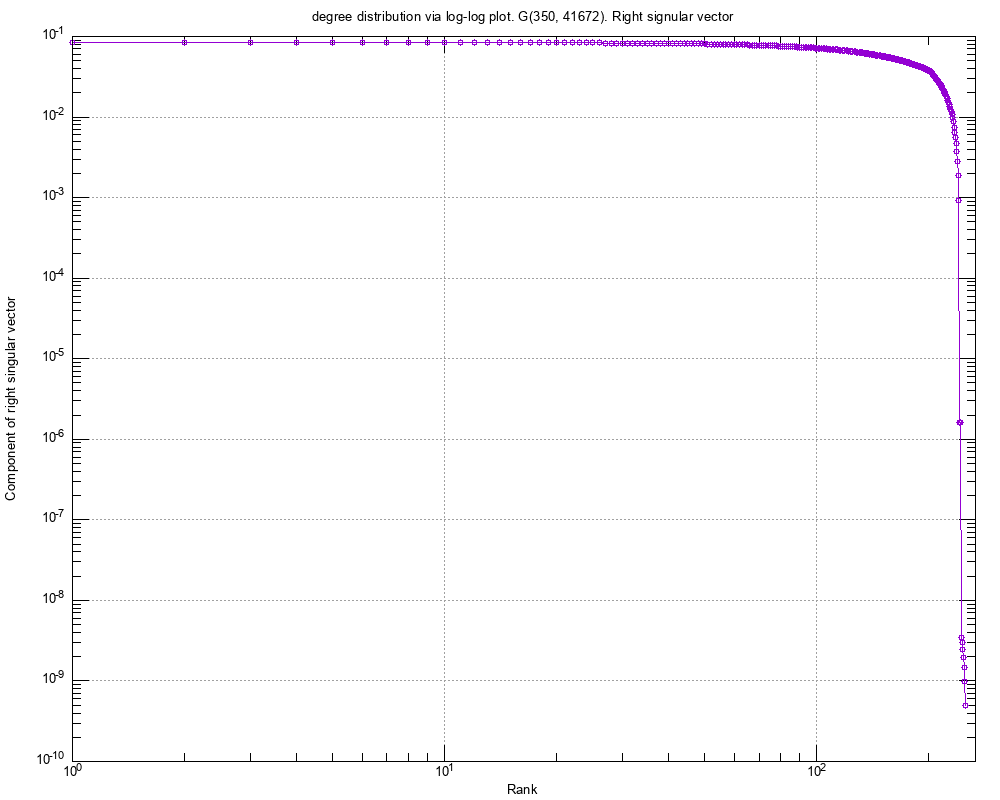

In [22]:
# degree distribution via log-log plot using SNAP
PG = snap.LoadEdgeList(snap.PNGraph, f"{networkWritePath}simulation_graph.txt", 0, 1)
PG.PlotSngVec("loglog", "degree distribution via log-log plot")
Image(filename='sngVecL.loglog.png') 

Text(0.5, 0, 'rank')

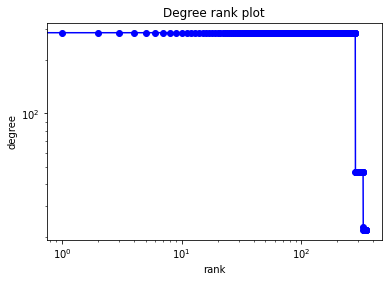

In [23]:
# degree distribution via log-log plot using NetworkX
degree_sequence = sorted(dict(GP.degree()).values(), reverse=True)
plt.loglog(degree_sequence,'b-',marker='o')
plt.title('Degree rank plot')
plt.ylabel('degree')
plt.xlabel('rank')
